In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import joblib
import pickle

In [29]:
df_water = pd.read_csv('water_potability.csv')
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [30]:
df_water.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [31]:
df_water_cleaned = df_water.fillna(df_water.mean())

In [32]:
df_water_cleaned.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


<Axes: xlabel='Potability', ylabel='count'>

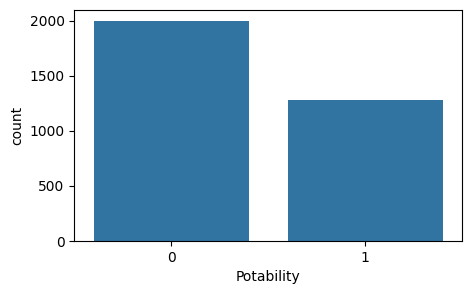

In [33]:
plt.figure(figsize = (5, 3))
sns.countplot(x = 'Potability', data = df_water_cleaned)

In [34]:
x = df_water_cleaned[list(df_water_cleaned.columns)[0:-1]]

In [35]:
y = df_water_cleaned['Potability']

### data spliting

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=101)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2620, 9)
(2620,)
(656, 9)
(656,)


Accuracy of Logistic Regression: 64.63
              precision    recall  f1-score   support

           0       0.65      0.90      0.76       402
           1       0.61      0.24      0.34       254

    accuracy                           0.65       656
   macro avg       0.63      0.57      0.55       656
weighted avg       0.64      0.65      0.60       656



<Axes: >

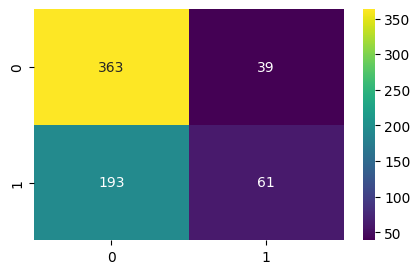

In [38]:
# Logistic Regression
model= GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy1 = round(accuracy_score(y_test, pred) * 100, 2)
print(f'Accuracy of Logistic Regression: {accuracy1}')
print(classification_report(y_test, pred))
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '', cmap = 'viridis')

Accuracy of Logistic Regression: 64.63
              precision    recall  f1-score   support

           0       0.65      0.90      0.76       402
           1       0.61      0.24      0.34       254

    accuracy                           0.65       656
   macro avg       0.63      0.57      0.55       656
weighted avg       0.64      0.65      0.60       656



<Axes: >

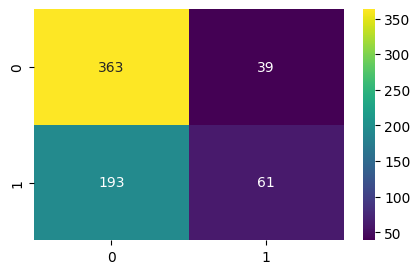

In [39]:
# Logistic Regression
model1= KNeighborsClassifier()
model1.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy2 = round(accuracy_score(y_test, pred) * 100, 2)
print(f'Accuracy of Logistic Regression: {accuracy2}')
print(classification_report(y_test, pred))
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '', cmap = 'viridis')

Accuracy of Logistic Regression: 65.7
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       402
           1       0.57      0.48      0.52       254

    accuracy                           0.66       656
   macro avg       0.63      0.62      0.63       656
weighted avg       0.65      0.66      0.65       656



<Axes: >

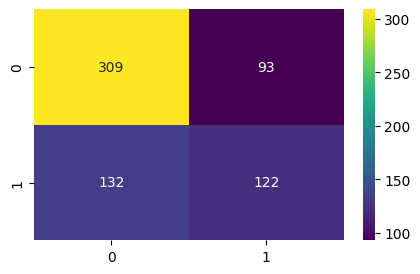

In [40]:
# Logistic Regression
model= XGBClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy3 = round(accuracy_score(y_test, pred) * 100, 2)
print(f'Accuracy of Logistic Regression: {accuracy3}')
print(classification_report(y_test, pred))
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '', cmap = 'viridis')

Text(0, 0.5, 'Accuracy')

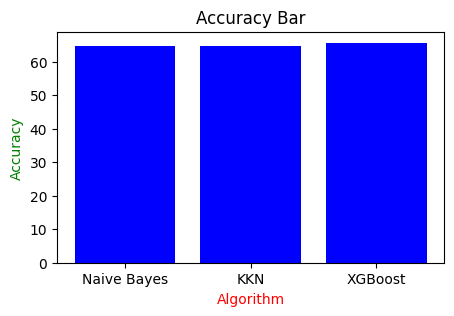

In [47]:
algorithm = ["Naive Bayes","KKN","XGBoost"]
accuracy = [accuracy1,accuracy2,accuracy3]

plt.figure(figsize = (5, 3))

bars = plt.bar(algorithm,accuracy, color = 'blue')
plt.title('Accuracy Bar')
plt.xlabel('Algorithm', color = 'red')
plt.ylabel('Accuracy', c = 'green')

In [52]:
joblib.dump(model, 'model.pkl')


['model.pkl']

In [53]:
with open('water_model.pkl', 'wb') as f:
    pickle.dump(model, f)
